A. Descriptive Statistics

In [1]:
# import neccessary python liberaries
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

sys.path.insert(0, os.path.dirname(os.getcwd()))

from src.EDA_Stock_Analysis import *

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load  Data 
file_path='../data/raw_analyst_ratings/raw_analyst_ratings.csv'
# create an object
text_analyser=StockMarketAnalysis(file_path)
text_analyser.load_data()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [3]:
# data quality check
text_analyser.check_data_quality();

Missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

 Number of duplicates: 0

 Data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [4]:
# Drop column name "Unnamed"
text_analyser.drop_unnamed_column()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [5]:
# headline length statistics
summery=text_analyser.headline_length_stats()
print(summery)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
# Count the number of articles per publisher to identify which publishers are most active.
articles_per_publisher=text_analyser.article_per_publisher()
articles_per_publisher

Article Counts per Publisher:


,Publisher,Article Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


In [7]:
articles_over_time, articles_by_day = text_analyser.analyze_publication_dates()
print("Articles over time: \n", articles_over_time)
print("Articles by day: \n", articles_by_day)

Articles over time: 
        year  month  article_count
0    2011.0    4.0              6
1    2011.0    5.0             78
2    2011.0    6.0             95
3    2011.0    7.0            137
4    2011.0    8.0            149
..      ...    ...            ...
106  2020.0    2.0           2355
107  2020.0    3.0           4681
108  2020.0    4.0           4616
109  2020.0    5.0           9333
110  2020.0    6.0           5990

[111 rows x 3 columns]
Articles by day: 
 day_of_week
Thursday     12712
Wednesday    11873
Tuesday      11037
Monday       10297
Friday        9407
Sunday         388
Saturday       273
Name: count, dtype: int64


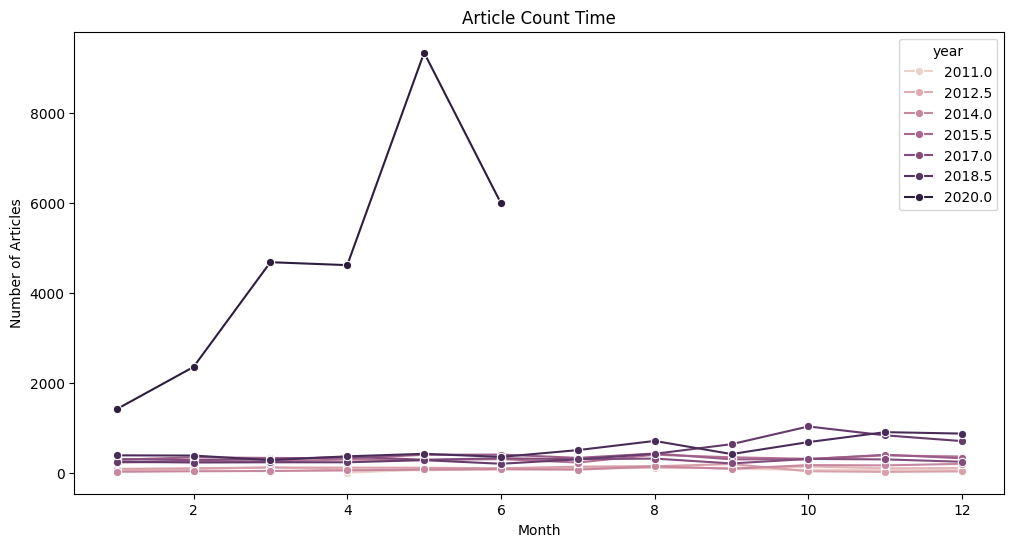

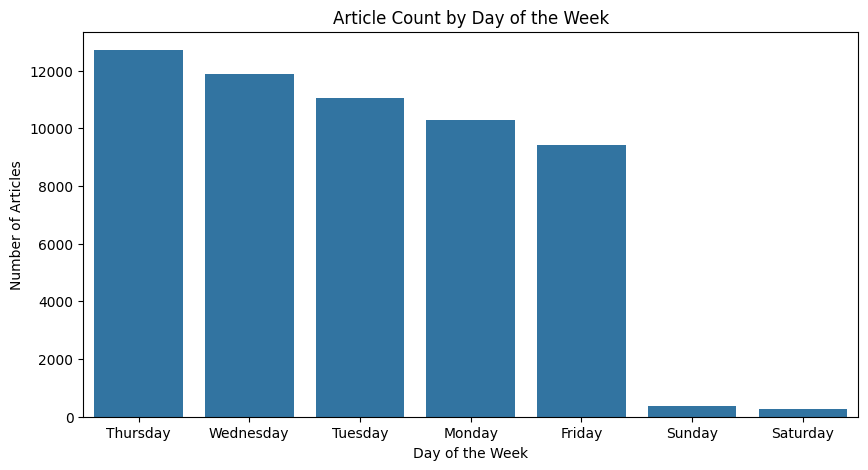

In [8]:
text_analyser.plot_article_trends(articles_over_time, articles_by_day)

B. Text Analysis(Sentiment analysis & Topic Modeling)

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/gech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
cleand_data=text_analyser.text_preprocess()
cleand_data

,headline,url,publisher,date,stock,headline_length,cleaned_headline
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,stocks hit week highs friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,stocks hit week highs wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,biggest movers friday
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,stocks moving fridays midday session
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,b securities maintains neutral agilent technol...
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,top narrow based indexes august
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,recap wednesdays top percentage gainers losers
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,update oppenheimer color china zenix auto init...
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,oppenheimer initiates china zenix outperform pt


In [10]:
# get sentiment
result=text_analyser.get_sentiment()
result

,headline,url,publisher,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


sentiment
Neutral     969417
positive    329730
Negative    108181
Name: count, dtype: int64


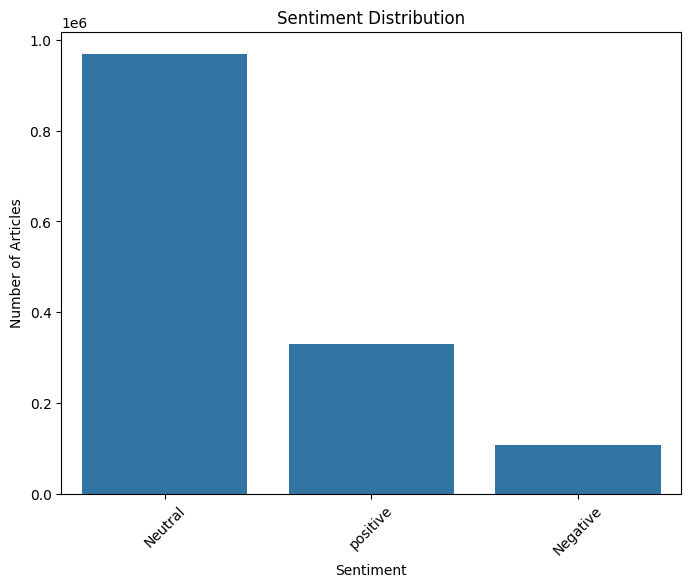

In [11]:
text_analyser.plot_sentiment_distribution()

In [12]:
print(text_analyser.text_preprocess().columns)

Index(['headline', 'url', 'publisher', 'date', 'stock', 'headline_length',
       'year', 'month', 'day_of_week', 'cleaned_headline', 'polarity',
       'sentiment'],
      dtype='object')


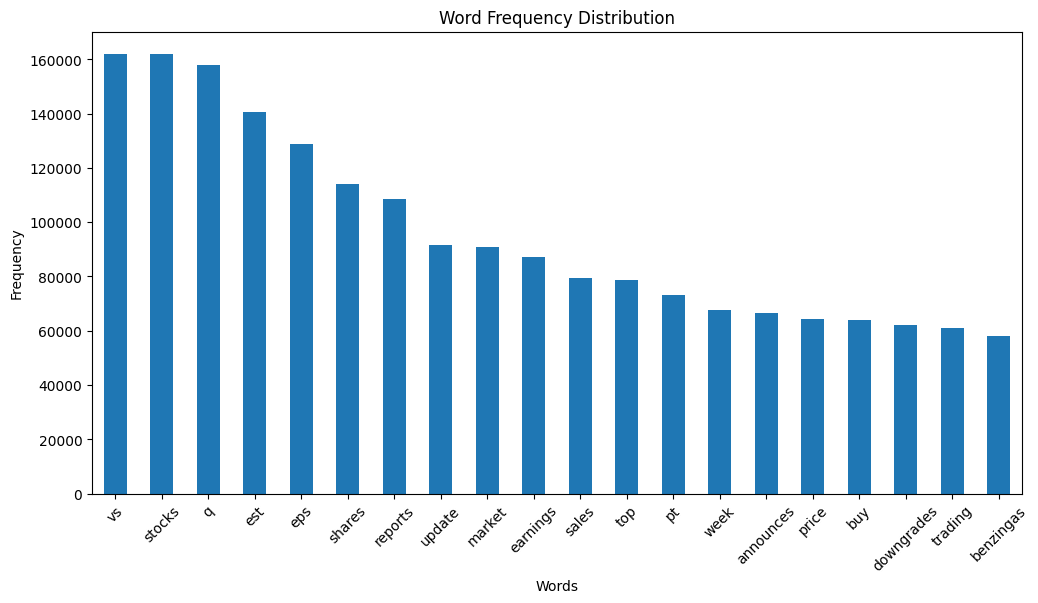

In [13]:
#common keywords or phrases
text_analyser.word_frequency()


In [14]:
keywords=text_analyser.extract_keywords()
print("Sentiment Analysis Results:")
print("\nExtracted Keywords:")
print(keywords)

Sentiment Analysis Results:

Extracted Keywords:
['eps' 'est' 'shares' 'stocks' 'vs']


In [ ]:
# Topic Modeling
topics = text_analyser.perform_topic_modeling()
print("\nIdentified Topics:")
print(topics)